In [1]:
from cate import ops
import xarray as xr
import numpy as np

In [2]:
ds = xr.Dataset({
            'first': (['time', 'lat', 'lon'], np.random.random((2,10,20))),
            'second': (['time', 'lat', 'lon'], np.random.random((2,10,20))),
            'lat': np.linspace(-81, 81, 10),
            'lon': np.linspace(-171, 171, 20),
            'time': np.array([1, 2])})

C:\Users\janis\Miniconda3\envs\cate-env\lib\site-packages\xarray\plot\utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


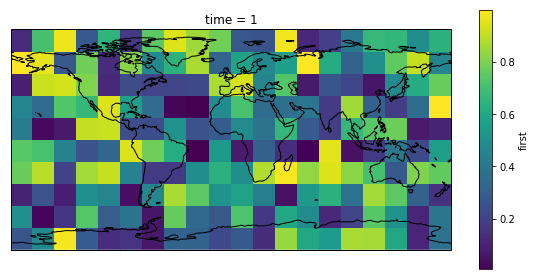

In [3]:
%matplotlib inline
import matplotlib.patches as patches
import matplotlib.pyplot as plt

ax = ops.plot_map(ds=ds, var='first')

([<matplotlib.axis.YTick at 0x1a849590>,
 <a list of 10 Text yticklabel objects>)

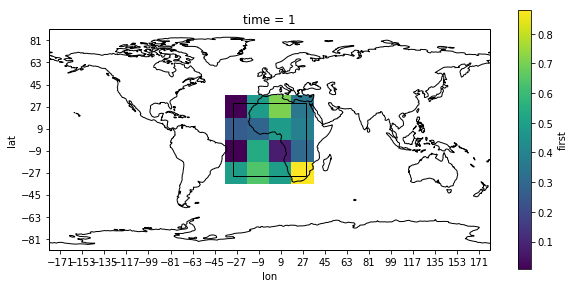

In [4]:
reg = [(-30, 30), (30, 30), (30, -30), (-30, -30)]
ds1 = ops.subset_spatial(ds=ds, region=reg)
ax = ops.plot_map(ds1, var='first')
ax.add_patch(patches.Polygon(reg, fill=False))
plt.xticks(ds.lon.values)
plt.yticks(ds.lat.values)

([<matplotlib.axis.YTick at 0x1a987c50>,
 <a list of 10 Text yticklabel objects>)

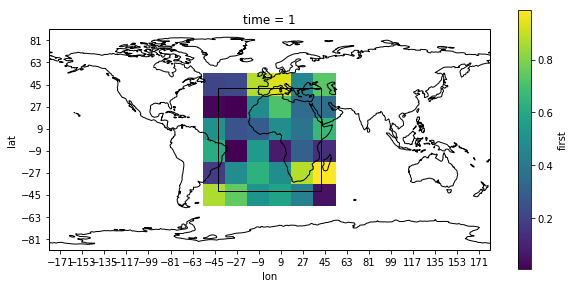

In [5]:
reg = [(-42, 42), (42, 42), (42, -42), (-42, -42)]
ds2 = ops.subset_spatial(ds=ds, region=reg)
ax = ops.plot_map(ds2, var='first')
ax.add_patch(patches.Polygon(reg, fill=False))
plt.xticks(ds.lon.values)
plt.yticks(ds.lat.values)

C:\Users\janis\Miniconda3\envs\cate-env\lib\site-packages\xarray\core\dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


([<matplotlib.axis.YTick at 0x1af76470>,
 <a list of 10 Text yticklabel objects>)

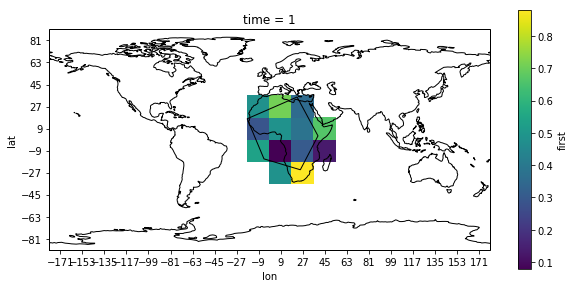

In [6]:
poly = ((-18.37890625,17.034305851402284),(22.40234375,34.79449777888723),(39.453125,3.0512170864479766),(25.0390625,-24.628443675479943),(-4.66796875,-15.730295059062692),(-18.37890625,17.034305851402284))
ds3 = ops.subset_spatial(ds=ds, region=poly)
ax = ops.plot_map(ds3, var='first')
ax.add_patch(patches.Polygon(poly, fill=False))
plt.xticks(ds.lon.values)
plt.yticks(ds.lat.values)

([<matplotlib.axis.YTick at 0x1a0704b0>,
 <a list of 4 Text yticklabel objects>)

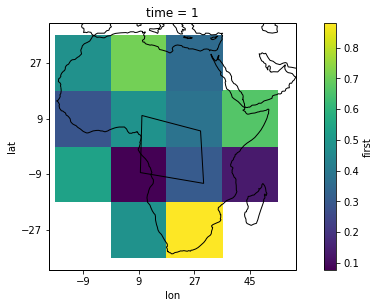

In [7]:
# A polygon that fits completely inside a pixel, but includes pixel center
africa = '-20.0, -40.0, 60.0, 40.0'
ax = ops.plot_map(ds3, var='first', region=africa)
poly = ((9.5,-8.5),(10,10),(29,5),(30,-12))
ax.add_patch(patches.Polygon(poly, fill=False))
plt.xticks(ds.lon.sel(lon=slice(-20, 60)))
plt.yticks(ds.lat.sel(lat=slice(-40, 40)))

C:\Users\janis\Miniconda3\envs\cate-env\lib\site-packages\xarray\core\dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


([<matplotlib.axis.YTick at 0x1af34c70>,
 <a list of 4 Text yticklabel objects>)

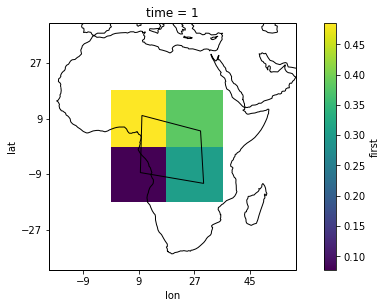

In [8]:
# A polygon that fits completely inside a pixel, but includes pixel center
africa = '-20.0, -40.0, 60.0, 40.0'
poly = ((9.5,-8.5),(10,10),(29,5),(30,-12))
ds4 = ops.subset_spatial(ds3, region=poly, mask=True)
ax = ops.plot_map(ds4, var='first', region=africa)
ax.add_patch(patches.Polygon(poly, fill=False))
plt.xticks(ds.lon.sel(lon=slice(-20, 60)))
plt.yticks(ds.lat.sel(lat=slice(-40, 40)))

([<matplotlib.axis.YTick at 0x1af34f90>,
 <a list of 4 Text yticklabel objects>)

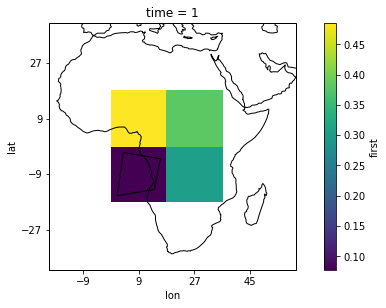

In [9]:
poly = ((2,-16),(4,-2),(16, -4),(14, -14))
#ds4 = ops.subset_spatial(ds3, region=poly)
ax = ops.plot_map(ds4, var='first', region=africa)
ax.add_patch(patches.Polygon(poly, fill=False))
plt.xticks(ds.lon.sel(lon=slice(-20, 60)))
plt.yticks(ds.lat.sel(lat=slice(-40, 40)))

In [10]:
ds5 = ops.subset_spatial(ds4, region=poly)
print(ds5)
#ax = ops.plot_map(ds5, var='first', region=africa)
#ax.add_patch(patches.Polygon(poly, fill=False))
#plt.xticks(ds.lon.sel(lon=slice(-20, 60)))
#plt.yticks(ds.lat.sel(lat=slice(-40, 40)))

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 2)
Coordinates:
  * lat      (lat) float64 -9.0
  * lon      (lon) float64 9.0
  * time     (time) int32 1 2
Data variables:
    first    (time, lat, lon) float64 0.07769 0.2844
    second   (time, lat, lon) float64 0.8599 0.744
Attributes:
    geospatial_lon_resolution:  0.0
    geospatial_lon_min:         9.0
    geospatial_lon_max:         9.0
    geospatial_lat_resolution:  0.0
    geospatial_lat_min:         -9.0
    geospatial_lat_max:         -9.0
    geospatial_bounds:          POLYGON((9.0 -9.0, 9.0 -9.0, 9.0 -9.0, 9.0 -9...
    history:                    \nModified with Cate v2.0.0.dev4 cate.ops.sub...


C:\Users\janis\Miniconda3\envs\cate-env\lib\site-packages\xarray\core\dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


In [11]:
ds6 = ops.subset_spatial(ds5, region=poly, mask=True)
print(ds6)

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 2)
Coordinates:
  * lat      (lat) float64 -9.0
  * lon      (lon) float64 9.0
  * time     (time) int32 1 2
Data variables:
    first    (time, lat, lon) float64 0.07769 0.2844
    second   (time, lat, lon) float64 0.8599 0.744
Attributes:
    geospatial_lon_resolution:  0.0
    geospatial_lon_min:         9.0
    geospatial_lon_max:         9.0
    geospatial_lat_resolution:  0.0
    geospatial_lat_min:         -9.0
    geospatial_lat_max:         -9.0
    geospatial_bounds:          POLYGON((9.0 -9.0, 9.0 -9.0, 9.0 -9.0, 9.0 -9...
    history:                    \nModified with Cate v2.0.0.dev4 cate.ops.sub...


C:\Users\janis\Miniconda3\envs\cate-env\lib\site-packages\xarray\core\dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


([<matplotlib.axis.YTick at 0x34129d0>,
 <a list of 4 Text yticklabel objects>)

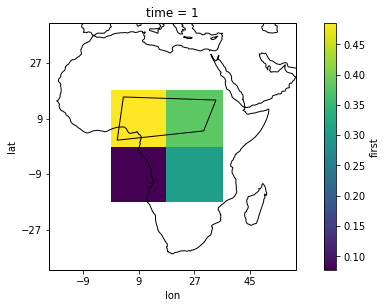

In [12]:
# Test with the polygon crossing lat boundary, but not including any vertices and centers
poly = ((2, 2), (4, 16), (34, 15), (30, 5))
ax = ops.plot_map(ds4, var='first', region=africa)
ax.add_patch(patches.Polygon(poly, fill=False))
plt.xticks(ds.lon.sel(lon=slice(-20, 60)))
plt.yticks(ds.lat.sel(lat=slice(-40, 40)))

In [13]:
ds5 = ops.subset_spatial(ds4, region=poly)
print(ds5)

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 2, time: 2)
Coordinates:
  * lat      (lat) float64 9.0
  * lon      (lon) float64 9.0 27.0
  * time     (time) int32 1 2
Data variables:
    first    (time, lat, lon) float64 0.4853 0.3834 0.6179 0.5871
    second   (time, lat, lon) float64 0.5823 0.3344 0.2055 0.9821
Attributes:
    geospatial_lon_resolution:  18.0
    geospatial_lon_min:         0.0
    geospatial_lon_max:         36.0
    geospatial_lat_resolution:  0.0
    geospatial_lat_min:         9.0
    geospatial_lat_max:         9.0
    geospatial_bounds:          POLYGON((0.0 9.0, 0.0 9.0, 36.0 9.0, 36.0 9.0...
    history:                    \nModified with Cate v2.0.0.dev4 cate.ops.sub...


C:\Users\janis\Miniconda3\envs\cate-env\lib\site-packages\xarray\core\dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


In [14]:
poly = ((2, 2), (4, 16), (16, 15), (15, 5))
ds5 = ops.subset_spatial(ds5, region=poly)
print(ds5)

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 2)
Coordinates:
  * lat      (lat) float64 9.0
  * lon      (lon) float64 9.0
  * time     (time) int32 1 2
Data variables:
    first    (time, lat, lon) float64 0.4853 0.6179
    second   (time, lat, lon) float64 0.5823 0.2055
Attributes:
    geospatial_lon_resolution:  0.0
    geospatial_lon_min:         9.0
    geospatial_lon_max:         9.0
    geospatial_lat_resolution:  0.0
    geospatial_lat_min:         9.0
    geospatial_lat_max:         9.0
    geospatial_bounds:          POLYGON((9.0 9.0, 9.0 9.0, 9.0 9.0, 9.0 9.0, ...
    history:                    \nModified with Cate v2.0.0.dev4 cate.ops.sub...


C:\Users\janis\Miniconda3\envs\cate-env\lib\site-packages\xarray\core\dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


([<matplotlib.axis.YTick at 0x1a1ad530>,
 <a list of 4 Text yticklabel objects>)

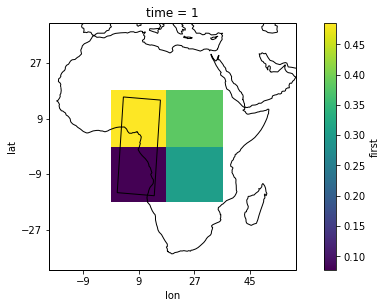

In [ ]:
# Test with the polygon crossing lon boundary, but not including any vertices and centers
poly = ((4, 16), (16, 15), (14, -16), (2, -15))
ax = ops.plot_map(ds4, var='first', region=africa)
ax.add_patch(patches.Polygon(poly, fill=False))
plt.xticks(ds.lon.sel(lon=slice(-20, 60)))
plt.yticks(ds.lat.sel(lat=slice(-40, 40)))

In [20]:
ds5 = ops.subset_spatial(ds4, region=poly)
print(ds5)

<xarray.Dataset>
Dimensions:  (lat: 1, lon: 1, time: 2)
Coordinates:
  * lat      (lat) float64 9.0
  * lon      (lon) float64 9.0
  * time     (time) int32 1 2
Data variables:
    first    (time, lat, lon) float64 0.4853 0.6179
    second   (time, lat, lon) float64 0.5823 0.2055
Attributes:
    geospatial_lon_resolution:  0.0
    geospatial_lon_min:         9.0
    geospatial_lon_max:         9.0
    geospatial_lat_resolution:  0.0
    geospatial_lat_min:         9.0
    geospatial_lat_max:         9.0
    geospatial_bounds:          POLYGON((9.0 9.0, 9.0 9.0, 9.0 9.0, 9.0 9.0, ...
    history:                    \nModified with Cate v2.0.0.dev4 cate.ops.sub...


C:\Users\janis\Miniconda3\envs\cate-env\lib\site-packages\xarray\core\dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


In [ ]:
poly = ((2,-16),(4,-2),(16, -4),(14, -14))
ds5 = subset_spatial_impl(ds5, region=poly, mask=True)
print(ds5)

In [ ]:
        dataset = xr.Dataset({
            'first': (['lat', 'lon', 'time'], np.random.random([6, 12, 3])),
            'second': (['lat', 'lon', 'time'], np.random.random([6, 12, 3])),
            'lat': np.linspace(-75, 75, 6),
            'lon': np.linspace(-165, 165, 12),
            'time': [1,2,3]})

In [ ]:
ax = ops.plot_map(dataset, var='first')
poly = ((32,2),(34,28),(58,29),(54,4))
ax.add_patch(patches.Polygon(poly, fill=False))
plt.xticks(dataset.lon.values)
plt.yticks(dataset.lat.values)

In [ ]:
ax = ops.plot_map(dataset, var='first')
poly = ((25,2),(27,40),(58,38),(54,4))
ax.add_patch(patches.Polygon(poly, fill=False))
plt.xticks(dataset.lon.values)
plt.yticks(dataset.lat.values)

In [ ]:
ax = ops.plot_map(dataset, var='first')
poly = ((25, 2), (27, 47), (12, 52), (10, 4))
ax.add_patch(patches.Polygon(poly, fill=False))
plt.xticks(dataset.lon.values)
plt.yticks(dataset.lat.values)

In [ ]:
ax = ops.plot_map(dataset, var='first')
poly = ((32, 32), (34, 58), (56, 56), (58, 33))
ax.add_patch(patches.Polygon(poly, fill=False))
plt.xticks(dataset.lon.values)
plt.yticks(dataset.lat.values)